# Introduction
Ce notebook Jupiter contient une étude rapide des 3 algorithmes de clustering sur une dataset 'gene expression cancer RNA-Seq'
L'ensemble de données est sur le lien suivant : https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq

Il s'agit d'une extraction aléatoire d'expressions génétiques de patients présentant différents types de tumeurs: BRCA, KIRC, COAD, LUAD et PRAD.
Cet ensemble est composé de 801 échantillon et 20531 attribut. Il contient 2 fichiers : fichier data.csv avec les échantillons et les attributs (les gènes) et label.csv contenant le type de tumeur de chaque échantillon et permettant ainsi la comparaison entre le résultat prédit et le résultat réel.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import csv
import pandas as pd

csv.field_size_limit(sys.maxsize)

import sklearn.datasets as skdata
from sklearn import metrics
from sklearn import cluster
from sklearn import neighbors

https://drive.google.com/file/d/1n50NsjKJ-HaryB852eqTSmfZlu-4naDc/view?usp=sharing

In [ ]:
!wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1n50NsjKJ-HaryB852eqTSmfZlu-4naDc' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1n50NsjKJ-HaryB852eqTSmfZlu-4naDc" -O data.csv && rm -rf /tmp/cookies.txt
!wget -q --show-progress --no-check-certificate 'https://docs.google.com/uc?export=download&id=1RvWtCUM26lIPCOmGZe4TJEDy4hzfUs1h' -O labels.csv

data.csv            100%[===================>] 196.63M  89.6MB/s    in 2.2s    
labels.csv          100%[===================>]  13.20K  --.-KB/s    in 0s      


In [ ]:
df = pd.read_csv('data.csv')
dt = pd.read_csv('labels.csv')

In [ ]:
df

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,...,gene_20491,gene_20492,gene_20493,gene_20494,gene_20495,gene_20496,gene_20497,gene_20498,gene_20499,gene_20500,gene_20501,gene_20502,gene_20503,gene_20504,gene_20505,gene_20506,gene_20507,gene_20508,gene_20509,gene_20510,gene_20511,gene_20512,gene_20513,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,0.591871,1.334282,2.015391,0.591871,0.000000,0.0,0.000000,0.000000,0.591871,5.619994,1.334282,0.000000,9.796088,0.0,0.000000,1.598651,7.215116,10.839070,6.620204,9.513538,0.000000,4.063658,7.764805,4.747656,13.714396,10.034496,0.000000,0.000000,9.833458,...,9.370304,10.362393,5.589928,8.141964,0.000000,2.736583,7.037152,7.123480,10.967399,5.902800,3.719370,7.203554,6.042557,2.602077,7.425526,7.846957,2.824951,6.239396,0.000000,8.469593,0.000000,6.535978,6.968701,7.128881,7.175175,9.249369,7.025970,8.045563,7.475709,7.205236,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,0.000000,0.587845,2.466601,1.004394,0.000000,0.0,0.000000,0.000000,0.000000,11.055208,3.562621,0.000000,10.070470,0.0,0.000000,0.000000,9.949812,8.522476,1.174790,4.926991,0.000000,0.000000,5.819832,1.327170,13.286240,6.663316,0.587845,0.000000,9.533302,...,8.882967,9.898199,7.069401,7.186134,0.000000,3.134993,6.648930,6.715701,9.536238,1.004394,5.555482,8.029260,6.366219,0.811142,7.991732,7.161001,0.000000,4.708877,0.811142,8.451689,0.000000,7.242336,8.046284,6.047558,8.572901,7.549030,7.019935,9.458940,9.190867,10.639259,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,0.000000,0.452595,1.981122,1.074163,0.000000,0.0,0.000000,0.000000,1.683023,8.210248,4.195285,3.660427,8.970920,0.0,0.000000,0.796598,6.096650,9.861616,7.680507,3.119439,0.000000,0.452595,7.899526,0.000000,10.731098,6.967883,0.452595,0.000000,9.646323,...,10.355637,10.423274,5.170201,6.194260,0.000000,3.677147,6.271990,7.089816,9.675220,0.000000,4.224017,8.020402,6.967883,5.014445,8.400038,7.527555,0.000000,4.997902,0.796598,7.761132,0.000000,6.820460,8.048983,6.661493,7.716332,6.745802,7.524667,8.602350,9.036654,10.336027,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,0.000000,0.434882,2.874246,0.000000,0.000000,0.0,0.000000,0.000000,1.267356,8.306317,3.573556,0.000000,8.524616,0.0,0.000000,0.000000,3.913761,9.511573,6.469165,7.029895,0.000000,1.267356,6.800641,7.742714,12.659474,8.299890,0.768587,0.000000,9.670731,...,10.074382,9.918261,7.117924,7.196145,0.434882,3.609755,8.896696,7.577096,10.731446,5.075383,2.175652,7.675435,6.840816,6.233192,8.899886,8.319085,1.791814,5.661134,1.464093,8.625727,0.000000,7.420095,7.784746,7.613915,8.963286,7.744699,7.924997,8.981473,8.665592,9.194823,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,0.000000,1.275841,2.141204,0.000000,0.000000,0.0,0.000000,0.000000,0.889707,10.149150,2.967630,0.000000,8.047238,0.0,1.435949,0.000000,1.942120,8.821535,5.861429,7.755709,0.000000,0.649386,5.570241,2.612801,13.556734,8.004754,0.000000,0.000000,9.587569,...,10.129154,10.062303,6.911620,7.855149,0.360982,3.655810,7.255520,7.292607,10.779793,3.954001,6.

In [ ]:
df.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,gene_39,...,gene_20491,gene_20492,gene_20493,gene_20494,gene_20495,gene_20496,gene_20497,gene_20498,gene_20499,gene_20500,gene_20501,gene_20502,gene_20503,gene_20504,gene_20505,gene_20506,gene_20507,gene_20508,gene_20509,gene_20510,gene_20511,gene_20512,gene_20513,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,0.688177,0.955504,2.667291,0.318108,0.214608,0.005879,0.003002,0.035498,2.204436,9.078900,3.286125,2.556424,8.266450,0.0,0.105504,0.526534,2.722476,9.209380,4.673866,6.182851,2.139337,1.168574,6.789898,2.284279,13.711217,8.545217,1.123570,0.202338,9.497384,1.363294,...,9.793412,10.284857,6.079328,7.945613,0.371288,4.905456,7.366911,7.049196,9.628212,2.354619,5.796625,7.744818,6.825166,3.859964,8.791191,8.045218,1.051505,6.031472,1.217945,8.147243,0.044261,6.856778,8.517432,7.347510,8.561671,8.021405,7.314292,8.687859,8.324222,8.788809,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,1.173568,0.877319,0.705767,0.673289,0.396474,0.065316,0.038493,0.192218,3.194977,1.203502,1.137231,2.448633,1.220976,0.0,0.411554,0.703966,2.667242,0.740969,2.049775,1.568571,3.160784,1.665570,0.857483,2.721062,1.272811,1.380301,1.369473,0.609529,0.425283,1.882621,...,0.503487,0.458172,0.811543,0.617257,0.757676,1.075023,0.809643,0.714542,1.376309,1.877525,0.893885,0.490483,0.485472,1.832004,0.524364,0.601594,1.264554,0.643518,0.697974,0.514244,0.175399,0.608048,0.743320,1.505049,0.636755,0.644683,0.576918,0.542212,0.823877,1.265211,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.437228,0.000000,0.000000,4.190164,0.0,0.000000,0.000000,0.000000,6.200934,0.000000,2.203890,0.000000,0.000000,4.238290,0.000000,9.378178,4.094641,0.000000,0.000000,7.191099,0.000000,...,8.113831,8.897349,2.583086,5.264987,0.000000,1.573908,4.253021,4.640604,4.383186,0.000000,1.066881,5.304664,5.124647,0.000000,6.729838,4.322945,0.000000,3.488194,0.000000,6.355971,0.000000,4.686904,5.555325,0.000000,5.709908,4.567479,0.000000,6.655299,6.294446,4.077841,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,0.000000,0.395831,2.243852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.286530,2.589260,0.000000,7.611490

In [ ]:
df = df.drop(columns='Unnamed: 0')
df.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,gene_39,...,gene_20491,gene_20492,gene_20493,gene_20494,gene_20495,gene_20496,gene_20497,gene_20498,gene_20499,gene_20500,gene_20501,gene_20502,gene_20503,gene_20504,gene_20505,gene_20506,gene_20507,gene_20508,gene_20509,gene_20510,gene_20511,gene_20512,gene_20513,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,0.591871,1.334282,2.015391,0.591871,0.0,0.0,0.0,0.0,0.591871,5.619994,1.334282,0.000000,9.796088,0.0,0.000000,1.598651,7.215116,10.839070,6.620204,9.513538,0.0,4.063658,7.764805,4.747656,13.714396,10.034496,0.000000,0.0,9.833458,0.000000,...,9.370304,10.362393,5.589928,8.141964,0.000000,2.736583,7.037152,7.123480,10.967399,5.902800,3.719370,7.203554,6.042557,2.602077,7.425526,7.846957,2.824951,6.239396,0.000000,8.469593,0.0,6.535978,6.968701,7.128881,7.175175,9.249369,7.025970,8.045563,7.475709,7.205236,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,0.000000,0.587845,2.466601,1.004394,0.0,0.0,0.0,0.0,0.000000,11.055208,3.562621,0.000000,10.070470,0.0,0.000000,0.000000,9.949812,8.522476,1.174790,4.926991,0.0,0.000000,5.819832,1.327170,13.286240,6.663316,0.587845,0.0,9.533302,0.811142,...,8.882967,9.898199,7.069401,7.186134,0.000000,3.134993,6.648930,6.715701,9.536238,1.004394,5.555482,8.029260,6.366219,0.811142,7.991732,7.161001,0.000000,4.708877,0.811142,8.451689,0.0,7.242336,8.046284,6.047558,8.572901,7.549030,7.019935,9.458940,9.190867,10.639259,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,0.000000,0.452595,1.981122,1.074163,0.0,0.0,0.0,0.0,1.683023,8.210248,4.195285,3.660427,8.970920,0.0,0.000000,0.796598,6.096650,9.861616,7.680507,3.119439,0.0,0.452595,7.899526,0.000000,10.731098,6.967883,0.452595,0.0,9.646323,0.452595,...,10.355637,10.423274,5.170201,6.194260,0.000000,3.677147,6.271990,7.089816,9.675220,0.000000,4.224017,8.020402,6.967883,5.014445,8.400038,7.527555,0.000000,4.997902,0.796598,7.761132,0.0,6.820460,8.048983,6.661493,7.716332,6.745802,7.524667,8.602350,9.036654,10.336027,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,0.000000,0.434882,2.874246,0.000000,0.0,0.0,0.0,0.0,1.267356,8.306317,3.573556,0.000000,8.524616,0.0,0.000000,0.000000,3.913761,9.511573,6.469165,7.029895,0.0,1.267356,6.800641,7.742714,12.659474,8.299890,0.768587,0.0,9.670731,0.434882,...,10.074382,9.918261,7.117924,7.196145,0.434882,3.609755,8.896696,7.577096,10.731446,5.075383,2.175652,7.675435,6.840816,6.233192,8.899886,8.319085,1.791814,5.661134,1.464093,8.625727,0.0,7.420095,7.784746,7.613915,8.963286,7.744699,7.924997,8.981473,8.665592,9.194823,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,0.000000,1.275841,2.141204,0.000000,0.0,0.0,0.0,0.0,0.889707,10.149150,2.967630,0.000000,8.047238,0.0,1.435949,0.000000,1.942120,8.821535,5.861429,7.755709,0.0,0.649386,5.570241,2.612801,13.556734,8.004754,0.000000,0.0,9.587569,0.649386,...,10.129154,10.062303,6.911620,7.855149,0.360982,3.655810,7.255520,7.292607,10.779793,3.954001,6.991148,8.153248,7.508444,4.586531,9.152227,8.227717,0.360982,6.227104,0.649386,8.151879,0.0,6.558289,8.673708,6.505099,8.948989,7.010366,7.364056,8.950646,8.233366,9.29

# Visualisation 

Suite au grand nombre d'attributs, il est impossible de visualiser directement les différents échantillons. Alors, on réalise une analyse de composants principales (PCA) pour les réduire à 2 attributs (le calcul de variance montre que c'est meilleur de prendre 3 ou 4 attributs, mais c'est plus pénible dans la visualisation).

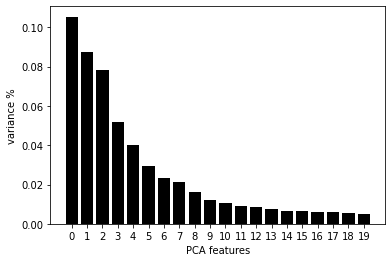

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df)
# Create a PCA instance: pca
pcax = PCA(n_components=20)
principalComponents = pcax.fit_transform(X_std)
# Plot the explained variances
features = range(pcax.n_components_)
plt.bar(features, pcax.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

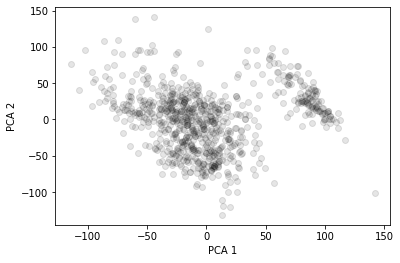

In [ ]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=2)
pcadata = pca.fit_transform(df)
pcaDf = pd.DataFrame(data = pcadata
             , columns = ['pca 1', 'pca 2'])

In [ ]:
pcaDf

,pca 1,pca 2
0,-62.755415,-94.071973
1,-2.432896,90.585842
2,-71.266853,-8.064607
3,-84.770785,-73.244565
4,-69.560171,-9.612940
...,...,...
796,-60.861882,-22.278633
797,-14.465433,53.392195
798,10.486261,21.570594
799,-55.063605,-92.394778


In [ ]:
finalDf = pd.concat([pcaDf, dt[['Class']]], axis = 1)
finalDf

,pca 1,pca 2,Class
0,-62.755415,-94.071973,PRAD
1,-2.432896,90.585842,LUAD
2,-71.266853,-8.064607,PRAD
3,-84.770785,-73.244565,PRAD
4,-69.560171,-9.612940,BRCA
...,...,...,...
796,-60.861882,-22.278633,BRCA
797,-14.465433,53.392195,LUAD
798,10.486261,21.570594,COAD
799,-55.063605,-92.394778,PRAD


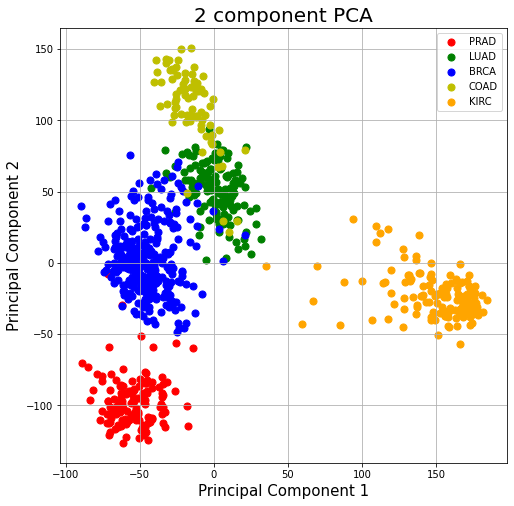

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['PRAD', 'LUAD', 'BRCA', 'COAD', 'KIRC']
colors = ['r', 'g', 'b', 'y', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pca 1']
               , finalDf.loc[indicesToKeep, 'pca 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.1583855, 0.1050396])

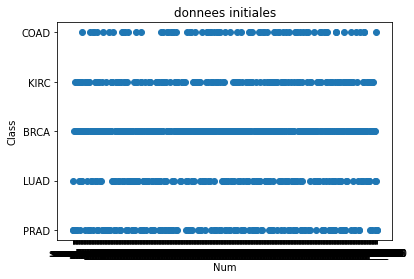

In [ ]:
plt.scatter(dt['Num'],dt['Class']);
plt.title('donnees initiales');
plt.xlabel('Num');
plt.ylabel('Class');
plt.show()

In [ ]:
data = df.values
dat = data[:,1:]
len(dat[0])

20530

# KMEANS
Kmeans :
Après avoir visualisé les données, j'ai passé au kmeans (effectué sur le dataset initial avec 20531 attribut pour plus de clarité)
Pour trouver le nombre de clusters, j'ai utilisé 2 méthodes : méthodes de Silhouette et méthode du coude (Elbow method). La méthode de silhouette a donné que 5 ou 6 est le nb optimale, alors que la méthode du coude a donné 5, donc j'ai choisi 5 clusters.
J'ai ensuite lancé kmeans avec 5 clusters, puis pour les visualiser, j'ai utilisé les attributs donné par PCA comme axes, et j'ai après calculé le ARI (adjusted rand score) pour comparer le résultat obtenu avec celui dans le fichier label.csv, et j'ai obtenu 0.9832017872380086

In [ ]:
c=range(2,11)     # les classes allant de 2 à 10
sil=[]
R=[]
for k in c:
    #k clusters, aléatoire initialisée à 42, 15 exécutions de k-means
    km=cluster.KMeans(n_clusters=k,random_state=42,n_init=15)
    res=km.fit(dat)                                              # entraînement de kmeans avec les données
    sil=np.append(sil,metrics.silhouette_score(dat,res.labels_)) # calcul de l'indice de silhouette
    R=np.append(R,res.inertia_)

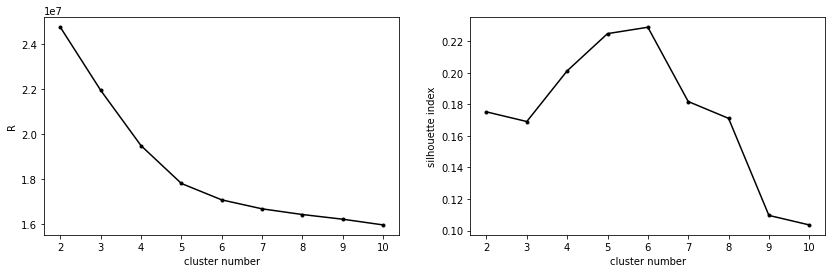

In [ ]:
# création des figures permettant le choix du nombre de clusters
figure = plt.figure(figsize = (14, 4))
plt.subplot(1,2,1) 
plt.plot(c,R,'.-k') 
plt.xlabel("cluster number")
plt.ylabel("R")

plt.subplot(1,2,2) 
plt.plot(c,sil,'.-k') 
plt.xlabel("cluster number")
plt.ylabel("silhouette index");

plt.show()

In [ ]:
km=cluster.KMeans(n_clusters=5,random_state=42,n_init=15)
res=km.fit(dat)      


In [ ]:
res.inertia_

17802169.115627512

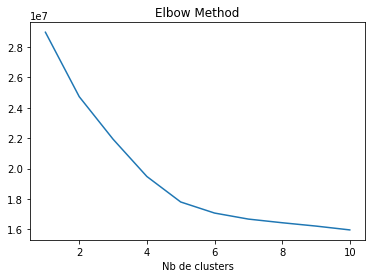

In [ ]:
L = []
for i in range(1, 11):
    kmeans = cluster.KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dat)
    L.append(kmeans.inertia_)
plt.plot(range(1, 11), L)
plt.title('Elbow Method')
plt.xlabel('Nb de clusters')
plt.ylabel('')
plt.show()

In [ ]:
kmeans = cluster.KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
label = kmeans.fit(dat).labels_
y_kmeans = kmeans.fit_predict(dat)

In [ ]:
center = kmeans.fit(dat).cluster_centers_
y_kmeans
center

array([[2.39455662, 2.44209827, 6.34427761, ..., 9.43000135, 5.12209056,
        0.12948832],
       [3.44104073, 3.97126223, 6.6624332 , ..., 9.69678011, 5.8496973 ,
        0.03572931],
       [3.44083332, 3.23252914, 7.82570638, ..., 9.35115207, 3.6022328 ,
        0.03282325],
       [2.83527335, 2.80449053, 6.69005602, ..., 9.7851823 , 6.14993228,
        0.06894019],
       [3.37127335, 3.47034268, 6.6353129 , ..., 9.36805457, 5.35571692,
        0.20880807]])

In [ ]:
label

array([1, 4, 1, 1, 3, 1, 0, 1, 3, 1, 3, 0, 1, 3, 3, 3, 4, 0, 0, 1, 3, 0,
       4, 3, 0, 4, 2, 3, 3, 3, 3, 3, 0, 3, 1, 3, 0, 4, 3, 3, 0, 1, 1, 0,
       0, 3, 1, 2, 3, 4, 3, 4, 3, 1, 2, 3, 3, 2, 0, 3, 4, 3, 3, 4, 1, 2,
       3, 1, 0, 3, 0, 3, 3, 4, 3, 4, 3, 0, 1, 2, 3, 1, 3, 3, 1, 1, 3, 3,
       0, 3, 1, 1, 3, 3, 3, 1, 2, 3, 1, 3, 3, 0, 3, 0, 4, 0, 4, 2, 4, 4,
       1, 3, 4, 1, 3, 0, 0, 0, 3, 3, 4, 0, 4, 3, 1, 1, 1, 3, 0, 3, 2, 3,
       2, 3, 3, 0, 4, 3, 0, 2, 3, 1, 3, 0, 4, 2, 1, 3, 4, 4, 4, 4, 3, 3,
       4, 3, 3, 1, 1, 4, 1, 4, 0, 3, 1, 4, 2, 0, 4, 3, 0, 4, 3, 4, 3, 3,
       3, 1, 3, 0, 2, 0, 3, 1, 1, 1, 4, 4, 3, 4, 4, 0, 4, 1, 4, 3, 3, 3,
       4, 4, 3, 0, 0, 0, 0, 1, 3, 1, 3, 4, 4, 3, 1, 3, 1, 3, 3, 3, 4, 3,
       0, 4, 0, 0, 4, 3, 0, 1, 3, 4, 4, 1, 2, 3, 0, 1, 0, 2, 3, 0, 0, 4,
       1, 1, 4, 4, 0, 3, 3, 2, 3, 1, 2, 3, 1, 0, 1, 1, 1, 3, 2, 2, 4, 2,
       2, 1, 4, 3, 3, 0, 0, 3, 2, 1, 0, 1, 3, 3, 0, 3, 3, 3, 3, 4, 4, 3,
       3, 3, 0, 0, 0, 0, 3, 3, 3, 0, 3, 3, 4, 1, 3,

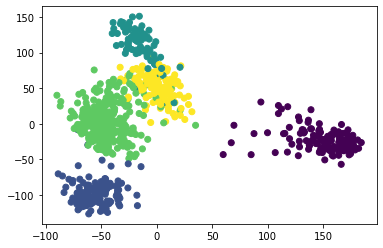

In [ ]:
plt.scatter(finalDf['pca 1'], finalDf['pca 2'],c=label)
    
plt.show()

In [ ]:
#Calcul de ARI

ARI=np.abs(metrics.adjusted_rand_score(dt['Class'],label))
ARI

0.9832017872380086

# Hierarchical:
Ici j'ai utilisé Dendrogram pour visualiser l'hiérarchie, puis j'ai utilisé AgglomerativeClustering présent dans sklearn.cluster en conservant le même nombre de cluster 5,
avec 4 types de linkage : single, complete, ward, average.
Puis j'ai trouvé le meilleur résultat pour le type 'ward' qui minimise la variance des clusters fusionné ARI 0.9869824601399302, et le 2ème pour le 'complete' 0.8486134979349159.
Le résultat obtenu par le 'ward linkage' est légèrement meilleur que celui obtenu par kmeans.

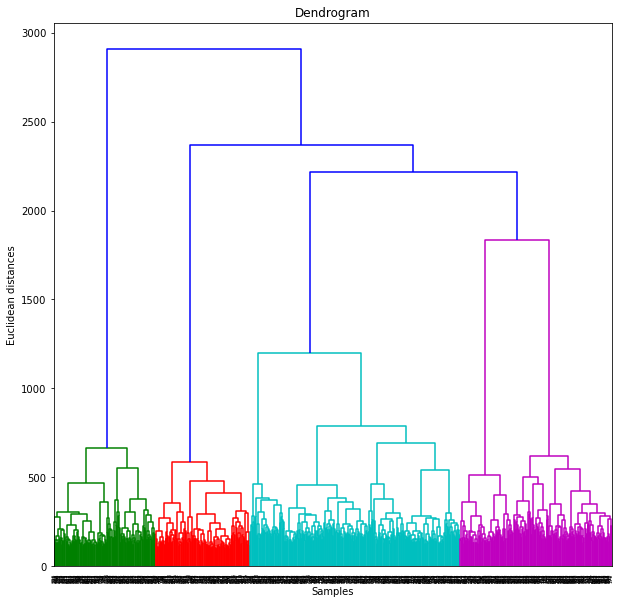

In [ ]:
#Hierarchical

#Dendogram sur dataset direct

import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(dat, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
chward = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
chsingle = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'single')
chcomplete = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
chaverage = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'average')

r_ward = chward.fit_predict(dat)
r_single = chsingle.fit_predict(dat)
r_complete = chcomplete.fit_predict(dat)
r_average = chaverage.fit_predict(dat)

In [ ]:
#Calcul de ARI

ARIw=np.abs(metrics.adjusted_rand_score(dt['Class'],r_ward))
ARIs=np.abs(metrics.adjusted_rand_score(dt['Class'],r_single))
ARIc=np.abs(metrics.adjusted_rand_score(dt['Class'],r_complete))
ARIa=np.abs(metrics.adjusted_rand_score(dt['Class'],r_average))

ARIw, ARIs, ARIc, ARIa

(0.9869824601399302,
 0.00036857319421287736,
 0.8486134979349159,
 0.00787047656963905)

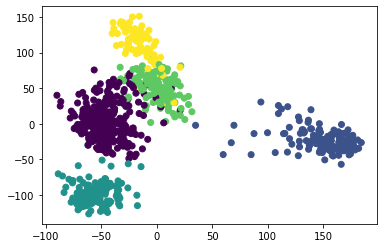

In [ ]:
#ward linkage
chwlab = chward.labels_
plt.scatter(finalDf['pca 1'], finalDf['pca 2'],c=chwlab)
    
plt.show()

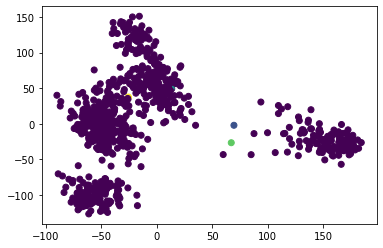

In [ ]:
#single linkage
chslab = chsingle.labels_
plt.scatter(finalDf['pca 1'], finalDf['pca 2'],c=chslab)
    
plt.show()

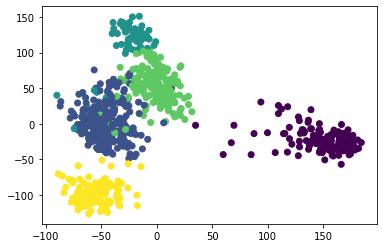

In [ ]:
#complete linkage
chclab = chcomplete.labels_
plt.scatter(finalDf['pca 1'], finalDf['pca 2'],c=chclab)
    
plt.show()

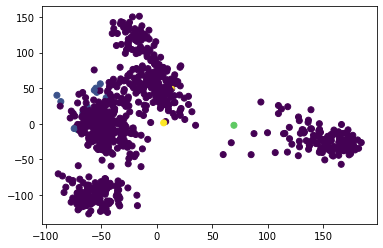

In [ ]:
#average linkage
chalab = chaverage.labels_
plt.scatter(finalDf['pca 1'], finalDf['pca 2'],c=chalab)
    
plt.show()

# DBscan:
Pour le clustering par densité, j'ai pas réussi de trouver l'eps pour la réalisation directement sur le dataset en utilisant la méthode "knee method".
Alors, j'ai réalisé le traitement sur la dataset obtenu après la réalisation du PCA : Cet dataset contient 2 attributs à la place de 20531.
Puis, grâce à la "Knee method", j'ai pris eps égal à 10, et j'ai lancé la DBSCAN.
J'ai obtenu 5 clusters et comme ARI 0.6961937454564057. Ce qui est moins performant que les 2 autres méthodes (largement à cause du fait que ce traitement est réalisé suite à une PCA).

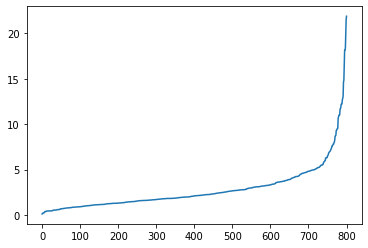

In [ ]:
#DBscan

#knee method pour trouver eps
from sklearn.neighbors import NearestNeighbors
nvoisin = NearestNeighbors(n_neighbors=10)
nvoisin.fit(pcaDf)
dist, indices = nvoisin.kneighbors(pcaDf)
dist = np.sort(dist, axis=0)[:, 1]
#print(dist)
plt.plot(dist)
plt.show()

In [ ]:
res=cluster.DBSCAN(eps=10,min_samples=10).fit(pcaDf) # exécution de DBSCAN

In [ ]:
ydb = res.fit_predict(pcaDf)
dblab = res.labels_

In [ ]:
dblab

array([ 0,  1,  2, -1,  2,  0, -1, -1,  2,  0,  2,  3,  0,  2, -1,  2,  1,
        3,  3,  0,  2, -1,  1, -1,  3,  1,  1,  2,  2,  2,  2,  2,  3,  2,
        0,  2, -1, -1,  2,  2,  3, -1,  0,  3,  3,  2,  0,  1,  2,  1,  2,
        1,  2,  0,  1, -1,  2,  1,  3,  2,  1, -1,  2,  1,  0,  1,  2,  0,
        3,  2,  3,  2,  2,  1,  2,  1,  2, -1,  0,  1,  2,  0,  2,  2,  0,
        0,  2,  2,  3,  1,  0,  0,  2,  2,  2,  0,  1,  2,  0,  2,  2,  3,
        2,  3,  1,  3,  1,  1,  1,  1,  0,  2,  1,  0,  2,  3,  3,  3,  2,
        2,  1,  3,  1,  2,  0,  0,  0,  2,  3, -1,  1,  2, -1,  2,  2,  3,
       -1,  2, -1,  1,  2,  0,  2, -1,  1,  1, -1,  2,  1,  1,  1,  1, -1,
        2, -1,  2,  2,  0,  0,  1,  0, -1,  3,  2,  0,  1,  1,  3,  1,  2,
        3,  1,  2,  1,  2,  2,  2,  0,  2,  3,  1, -1,  2,  0, -1,  0,  1,
        1,  2,  1,  1,  3,  1,  0,  1, -1,  2,  2,  1,  1, -1,  3,  3, -1,
        3,  0, -1, -1,  2,  1,  1,  2,  0,  2,  0,  2,  2,  2,  1,  2,  3,
        1,  3,  3,  1, -1

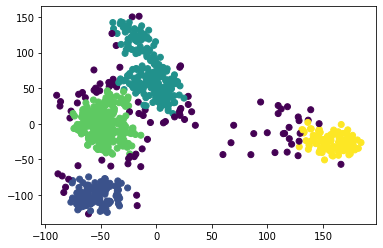

In [ ]:
plt.scatter(pcaDf['pca 1'],pcaDf['pca 2'],c=res.labels_);
plt.show()

In [ ]:
#Calcul de ARI

ARI=np.abs(metrics.adjusted_rand_score(dt['Class'],dblab))
ARI

0.6961937454564057